## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [20]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


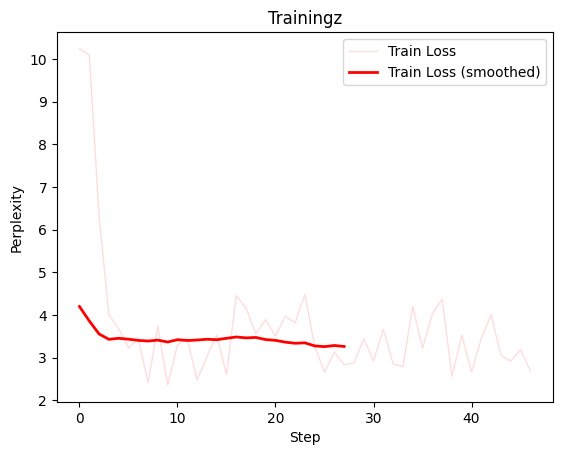

In [47]:
tdat = pd.read_csv('lightning_logs/version_3/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(20, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [43]:
np.mean(tdat.train_loss[-100:])


2.6990958750247955

In [44]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

AttributeError: 'DataFrame' object has no attribute 'val_loss'

In [45]:
tdat[-100:]

,train_loss,length,epoch,step
77,3.431941,36.0,0,7799
78,2.406254,46.0,0,7899
79,3.111192,30.0,0,7999
80,1.790347,62.0,0,8099
81,3.033524,43.0,0,8199
...,...,...,...,...
172,2.715870,42.0,0,17299
173,3.275700,35.0,0,17399
174,3.627172,26.0,0,17499
175,2.089228,40.0,0,17599
